In [295]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
import networkx as nx
import pandas as pd

In [39]:
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\Owner\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


In [254]:
driver.get('https://en.wikipedia.org/wiki/Main_Page')

In [255]:
soup_list = []
for x in range(10**3):
    driver.find_elements_by_partial_link_text('Random')[0].click()
    html = driver.page_source
    soup = BeautifulSoup(html,'html')
    if soup not in soup_list:
        soup_list.append(soup)
    else:
        driver.get('https://en.wikipedia.org/wiki/Main_Page')

IndexError: list index out of range

In [ ]:
for item in item_see_all_dic.keys():
    if item_see_all_dic[item]:
        for val in item_see_all_dic[item]:
            driver.get('https://en.wikipedia.org/wiki/'+val[1])
            html = driver.page_source
            soup = BeautifulSoup(html,'html')
            if soup not in soup_list:
                soup_list.append(soup)

In [345]:
def grab_link(link):
    try:
        return((link.find_all('a')[0]['href'], link.find_all('a')[0].text))
    except:
        pass

item_see_all_dic = {}
for soup in soup_list:
    headers = [head for head in soup.find_all('h2')]
    see_also = False
    for sp in headers:
        if 'See also' in sp.text:
            see_also = True
            link_list = [grab_link(link) for link in sp.find_next_sibling().find_all('li')]
            item_see_all_dic[soup.title.text.split(' - Wikipedia')[0]] = link_list
    if not see_also:
        item_see_all_dic[soup.title.text.split(' - Wikipedia')[0]] = None
    
    
    


In [356]:
g = nx.DiGraph()

In [357]:
for key in item_see_all_dic.keys():
    g.add_node(key)
    try:
        for val in item_see_all_dic[key]:
            g.add_edge(key,val[1])
    except:
        pass
    

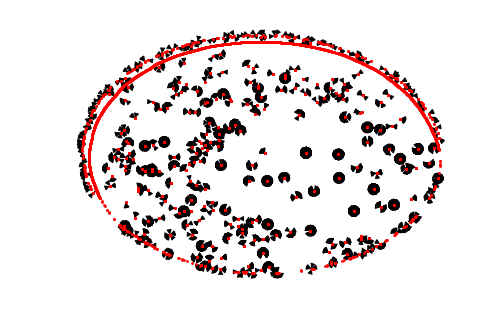

In [392]:
import matplotlib.pyplot as plt
nx.draw_kamada_kawai(g,node_size = 3, width = 1)
plt.draw()

In [363]:
import pandas as pd
article_list = item_see_all_dic.keys()
connect_frame = pd.DataFrame([[0]*len(article_list)]*len(article_list), index = article_list, columns = article_list)


In [374]:
for article in article_list:
    if item_see_all_dic[article]:
        for article2 in item_see_all_dic[article]:
            try:
                connect_frame[article][article2[1].split('/wiki/')[0]] = 1
            except:
                pass

In [393]:
connect_frame.to_csv('connect_database.csv')

In [395]:
plt.savefig('graph_img')